The hooper 2k method is a correlation developed to estimate the pressure drop a fluid loses given certain pipe fittings

The equation is given in the following equation:

$$K = \frac{K_{1}}{Re} + K_{\infty}(1+\frac{1}{D})$$

Where $K_1$ is the loss factor for the fitting at a reynolds number of 1 and $K_{\infty}$ represents the loss factor at an infinite reynolds number.

In [110]:
#Import necessary libraries

import fluids.fittings as fittings
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipy
import pandas as pd
import matplotlib.ticker as ticks

#Move Fittings Dictionary into a Pandas Dataframe

HooperCoefficients = pd.DataFrame.from_dict(fittings.Hooper,orient='index')



The dimensionless variable responsible for characterizing the type of flow is known as the reynolds number. This works by examining the ratio of inertial forces and viscous forces. It can be found below:

$$Re = \frac{D v \rho}{\mu}$$

Where $D$ is the characteristic length, $v$ is the velocity of the flow, $\rho$ is the density of the fluid, and $\mu$ is the viscosity of the fluid.

The function used to calculate this number can be found below:

In [20]:
def calculateReynolds(innerDiam:float,volFlow:float,viscosity:float,density:float)->float:
    '''
    Function takes in pipe inner diameter, fluid velocity, fluid viscosity, and fluid density and returns the reynolds number of the fluid.
    
    Parameters:
        innerDiam (float): inner pipe diameter in inches
        volFlow (float): Volumetric Flowrate in gallons per minute (gpm)
        viscosity (float): dynamic viscosity in centipoise
        density (float): density in pounds per cubic foot
        
    Returns:
        Reynolds Number (float): dimensionless number characterizing fluid flow
    '''
    
    #Converting to SI Units
    innerDiam = innerDiam * 0.0254 #m
    volFlow = volFlow / 15850 #m3/s
    viscosity = viscosity / 1000 #Pa s
    density = density * 16.0185 #kg/m3
    
    #Calculating velocity
    area = np.pi * np.pow(innerDiam,2) / 4 #m2
    velocity = volFlow / area #m/s
    
    #return reynolds number
    return (innerDiam * velocity * density / viscosity)
    

Once the reynolds number is calculated the following function was used to calculate the head loss factor (K)

In [119]:
def hooperHeadLoss(K1:float,Kinf:float,Re:float,D:float)->float:
    '''
    Calculates the head loss factor K given K1, K infinity, the Reynolds number, and the pipe diameter
    
    Parameters:
        K1 (float): Dimensionless constant derived from type of pipe fitting
        Kinf (float): Dimensionless constant derived from type of pipe fitting
        Re (float): Reynolds number Dimensionless constant characterizing flow in pipe
        D (float): pipe diameter (in) which the fluid is flowing in
        
    Return:
        K (float): Dimensionless constant which characterizes the head loss around the bend
        
    '''
    return (K1 / Re) + Kinf*(1+1/D)

Text(0.5, 1.0, 'Hooper 2K: K-Factor over Reynolds Number (D = 0.71)')

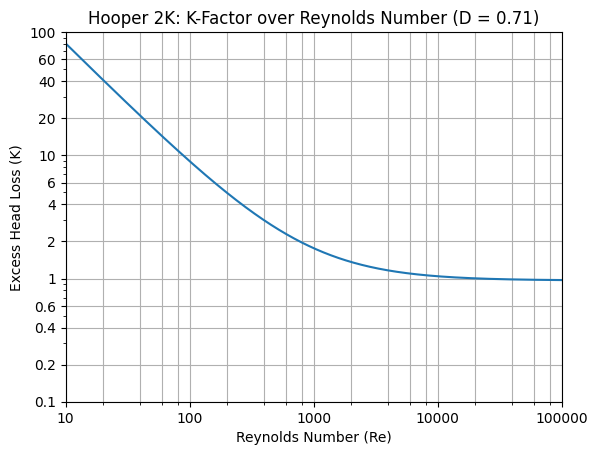

In [122]:
#Create Objects
fig1, ax1 = plt.subplots()

#Create Data
reynoldsRange = np.logspace(1,5,base=10,num=10000)
headLoss = hooperHeadLoss(800,0.40,reynoldsRange,0.71)

#Plot the Data and Adjust Axis Range
plt.loglog(reynoldsRange,headLoss)
ax1.set_ylim([0.1,100])
ax1.set_xlim([10,100000])

#Modify ticks to match paper by Hooper
ax1.set_yticks([0.1, 0.2,0.4,0.6,1,2,4,6,10,20,40,60,100])
ax1.set_yticklabels(['0.1', '0.2','0.4','0.6','1','2','4','6','10','20','40','60','100'])
ax1.xaxis.set_major_formatter(ticks.ScalarFormatter())
ax1.xaxis.set_minor_locator(ticks.LogLocator(base=10.0,subs=[0.2,0.4,0.6,0.8]))

#Add gridlines
ax1.yaxis.grid(which='major')
ax1.xaxis.grid(which='both')

#Format axis labels
ax1.set_xlabel("Reynolds Number (Re)",)
ax1.set_ylabel("Excess Head Loss (K)")
ax1.set_title("Hooper 2K: K-Factor over Reynolds Number (D = 0.71)")